In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score 

import nltk
# from nltk.corpus import movie_reviews

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/suyashi29/python-su/refs/heads/master/Natural%20Language%20Processing%20using%20Python/movie_reviews.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      4000 non-null   object
 1   Review     4000 non-null   object
 2   Sentiment  4000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 93.9+ KB


In [3]:
df.sample(3)

,Movie,Review,Sentiment
3577,The Dark Knight,The storyline was captivating.,1
1858,Goodfellas,Highly recommend this film!,1
3519,The Dark Knight,The film lacked originality.,0


In [4]:
%%time
import re
Review_Filtered = []
# for val in df['Review']:
    # Review_Filtered.append(re.sub(r'[^a-zA-Z0-9 ]', '', val))
# df['Review_Filtered'] = Review_Filtered
df['Review_Filtered'] = df['Review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]', '', x)) # Picking only ahpla-numeric characters and space using RE module
df.head()

CPU times: total: 0 ns
Wall time: 8.2 ms


,Movie,Review,Sentiment,Review_Filtered
0,Pulp Fiction,The special effects were incredible.,0,The special effects were incredible
1,The Dark Knight,The film lacked originality.,1,The film lacked originality
2,Forrest Gump,The screenplay was poorly written.,1,The screenplay was poorly written
3,Fight Club,Predictable plot.,0,Predictable plot
4,The Dark Knight,Disappointing ending.,1,Disappointing ending


In [5]:
# Review_Filtered_Combined = df['Review_Filtered'].str.split()

# Combine all reviews into a single string
Review_Filtered_Corpus = ' '.join(df['Review_Filtered'])
Review_Filtered_Corpus

'The special effects were incredible The film lacked originality The screenplay was poorly written Predictable plot Disappointing ending Disappointing ending Heartwarming and touching The acting was mediocre Amazing cinematography The acting was mediocre Not worth watching The film lacked originality I found the movie boring and uninteresting The screenplay was poorly written Terrible direction ruined the movie The film lacked originality The movie was absolutely fantastic Highly recommend this film Heartwarming and touching The acting was mediocre Predictable plot Couldnt stop laughing throughout the movie Amazing cinematography Amazing cinematography The acting was mediocre One of the best movies Ive ever seen The special effects were incredible Not worth watching The storyline was captivating One of the best movies Ive ever seen Amazing cinematography I didnt like the plot twist The movie kept me on the edge of my seat Great performances by the cast Great performances by the cast I 

In [6]:
type(Review_Filtered_Corpus)

str

In [7]:
len(Review_Filtered_Corpus)

120970

In [8]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

words_token = word_tokenize(Review_Filtered_Corpus) # Tokenizing using NLTK
words_token

['The',
 'special',
 'effects',
 'were',
 'incredible',
 'The',
 'film',
 'lacked',
 'originality',
 'The',
 'screenplay',
 'was',
 'poorly',
 'written',
 'Predictable',
 'plot',
 'Disappointing',
 'ending',
 'Disappointing',
 'ending',
 'Heartwarming',
 'and',
 'touching',
 'The',
 'acting',
 'was',
 'mediocre',
 'Amazing',
 'cinematography',
 'The',
 'acting',
 'was',
 'mediocre',
 'Not',
 'worth',
 'watching',
 'The',
 'film',
 'lacked',
 'originality',
 'I',
 'found',
 'the',
 'movie',
 'boring',
 'and',
 'uninteresting',
 'The',
 'screenplay',
 'was',
 'poorly',
 'written',
 'Terrible',
 'direction',
 'ruined',
 'the',
 'movie',
 'The',
 'film',
 'lacked',
 'originality',
 'The',
 'movie',
 'was',
 'absolutely',
 'fantastic',
 'Highly',
 'recommend',
 'this',
 'film',
 'Heartwarming',
 'and',
 'touching',
 'The',
 'acting',
 'was',
 'mediocre',
 'Predictable',
 'plot',
 'Couldnt',
 'stop',
 'laughing',
 'throughout',
 'the',
 'movie',
 'Amazing',
 'cinematography',
 'Amazing',
 'c

In [9]:
len(set(words_token))

68

In [10]:
stop_words_list = set(stopwords.words('english')) # Initializing global stop words
filtered_sentence = [word for word in words_token if word not in stop_words_list] # Final text without stop words
filtered_sentence

['The',
 'special',
 'effects',
 'incredible',
 'The',
 'film',
 'lacked',
 'originality',
 'The',
 'screenplay',
 'poorly',
 'written',
 'Predictable',
 'plot',
 'Disappointing',
 'ending',
 'Disappointing',
 'ending',
 'Heartwarming',
 'touching',
 'The',
 'acting',
 'mediocre',
 'Amazing',
 'cinematography',
 'The',
 'acting',
 'mediocre',
 'Not',
 'worth',
 'watching',
 'The',
 'film',
 'lacked',
 'originality',
 'I',
 'found',
 'movie',
 'boring',
 'uninteresting',
 'The',
 'screenplay',
 'poorly',
 'written',
 'Terrible',
 'direction',
 'ruined',
 'movie',
 'The',
 'film',
 'lacked',
 'originality',
 'The',
 'movie',
 'absolutely',
 'fantastic',
 'Highly',
 'recommend',
 'film',
 'Heartwarming',
 'touching',
 'The',
 'acting',
 'mediocre',
 'Predictable',
 'plot',
 'Couldnt',
 'stop',
 'laughing',
 'throughout',
 'movie',
 'Amazing',
 'cinematography',
 'Amazing',
 'cinematography',
 'The',
 'acting',
 'mediocre',
 'One',
 'best',
 'movies',
 'Ive',
 'ever',
 'seen',
 'The',
 'sp

In [11]:
len(set(filtered_sentence))

58

In [12]:
freq_dist = FreqDist(filtered_sentence)
print("Frequency Distribution:", freq_dist.most_common()) # Calculating top 10 most frequent words 

Frequency Distribution: [('The', 1409), ('movie', 1036), ('plot', 438), ('I', 432), ('film', 387), ('absolutely', 224), ('fantastic', 224), ('One', 224), ('best', 224), ('movies', 224), ('Ive', 224), ('ever', 224), ('seen', 224), ('Predictable', 219), ('didnt', 219), ('like', 219), ('twist', 219), ('found', 213), ('boring', 213), ('uninteresting', 213), ('Terrible', 211), ('direction', 211), ('ruined', 211), ('Amazing', 210), ('cinematography', 210), ('kept', 207), ('edge', 207), ('seat', 207), ('lacked', 202), ('originality', 202), ('storyline', 198), ('captivating', 198), ('Great', 198), ('performances', 198), ('cast', 198), ('special', 196), ('effects', 196), ('incredible', 196), ('screenplay', 194), ('poorly', 194), ('written', 194), ('Disappointing', 190), ('ending', 190), ('acting', 188), ('mediocre', 188), ('Not', 187), ('worth', 187), ('watching', 187), ('Heartwarming', 185), ('touching', 185), ('Highly', 185), ('recommend', 185), ('Couldnt', 181), ('stop', 181), ('laughing', 1

### Wordcloud

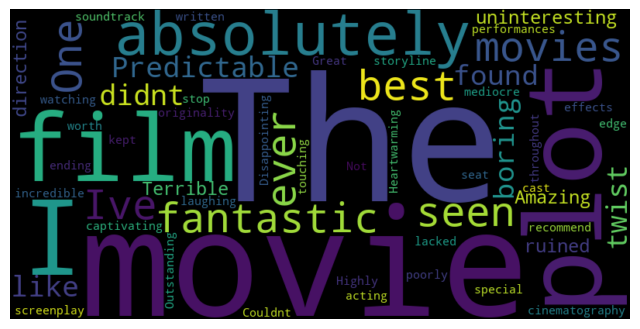

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq_dist)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Model building

In [14]:
X = df['Review_Filtered']
y = df['Sentiment']

In [15]:
# Feature extraction (TF-IDF):
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)
X_tfidf

<4000x50 sparse matrix of type '<class 'numpy.float64'>'
	with 11315 stored elements in Compressed Sparse Row format>

In [16]:
## Train - test split:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [17]:
X_train

<3200x50 sparse matrix of type '<class 'numpy.float64'>'
	with 9005 stored elements in Compressed Sparse Row format>

In [18]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
classifier

MultinomialNB()

In [19]:
y_pred = classifier.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.51

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.45      0.49       408
           1       0.50      0.57      0.53       392

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800

